# Niche and gene expression modalities

In [ ]:
!pip install squidpy
!pip install scanpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import anndata as ad
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


scanpy==1.10.2 anndata==0.10.9 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13
squidpy==1.6.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import anndata as ad

# Load the anndata object
adata = ad.read_h5ad('/content/drive/MyDrive/Colab Notebooks/adatas_all_0.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 936 × 568
    obs: 'id', 'array_row', 'array_col', 'cell_type', 'batch', 'imagecol', 'imagerow', 'label', 'sample', 'predict_sub', 'predict_sub_less'
    var: 'gene_ids-0', 'gene_ids-1'
    obsm: 'spatial'

In [ ]:
genes_M = ['Six2', 'Col3a1', 'Col1a2', 'Vcan', 'Gpc3', 'Lgals1', 'Fbn2', 'Rbp1', 'Col4a1', 'Cxcl12',
    "Epcr", "CD63", "Klrb1", "PanendothelialCellAntigen",
    "Epcam", "Klrb1", "Epcr", "CD55", "Folr1",
    "Ccdc34", "Ildr2", "Dbx1", "Alx1", "Crlf1", "Irx2", "Col11a1", "Limch1", "Aff3"
]

In [ ]:
missing_genes = [gene for gene in genes_M if gene not in adata.var_names]
print("Missing genes:", missing_genes)

Missing genes: ['Epcr', 'CD63', 'Klrb1', 'PanendothelialCellAntigen', 'Klrb1', 'Epcr', 'CD55', 'Folr1']


In [ ]:
genes_M = ['Six2', 'Col3a1', 'Col1a2', 'Vcan', 'Gpc3', 'Lgals1', 'Fbn2', 'Rbp1', 'Col4a1', 'Cxcl12',
    "Epcam",
    "Ccdc34", "Ildr2", "Dbx1", "Alx1", "Crlf1", "Irx2", "Col11a1", "Limch1", "Aff3"
]

In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
gene_expression = adata[:, genes_M].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
gene_corr = np.corrcoef(gene_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
gene_corr_df = pd.DataFrame(gene_corr, index=genes_M, columns=genes_M)

# Display the correlation matrix
print(gene_corr_df)

             Six2    Col3a1    Col1a2      Vcan      Gpc3    Lgals1      Fbn2  \
Six2     1.000000  0.167899  0.124132  0.075424  0.084623  0.018656  0.059263   
Col3a1   0.167899  1.000000  0.488955  0.348245  0.329805  0.457113  0.474776   
Col1a2   0.124132  0.488955  1.000000  0.251399  0.340262  0.348423  0.374285   
Vcan     0.075424  0.348245  0.251399  1.000000  0.296408  0.263407  0.352737   
Gpc3     0.084623  0.329805  0.340262  0.296408  1.000000  0.201132  0.369261   
Lgals1   0.018656  0.457113  0.348423  0.263407  0.201132  1.000000  0.301449   
Fbn2     0.059263  0.474776  0.374285  0.352737  0.369261  0.301449  1.000000   
Rbp1     0.011372 -0.008245  0.037681  0.022140  0.102912 -0.027789 -0.028989   
Col4a1   0.072968  0.438787  0.444978  0.212147  0.182356  0.288666  0.347127   
Cxcl12   0.166044  0.325120  0.322647  0.218779  0.265784  0.201881  0.270798   
Epcam    0.076459  0.027759  0.013308  0.002067  0.087917  0.049964  0.080014   
Ccdc34  -0.008957 -0.158361 

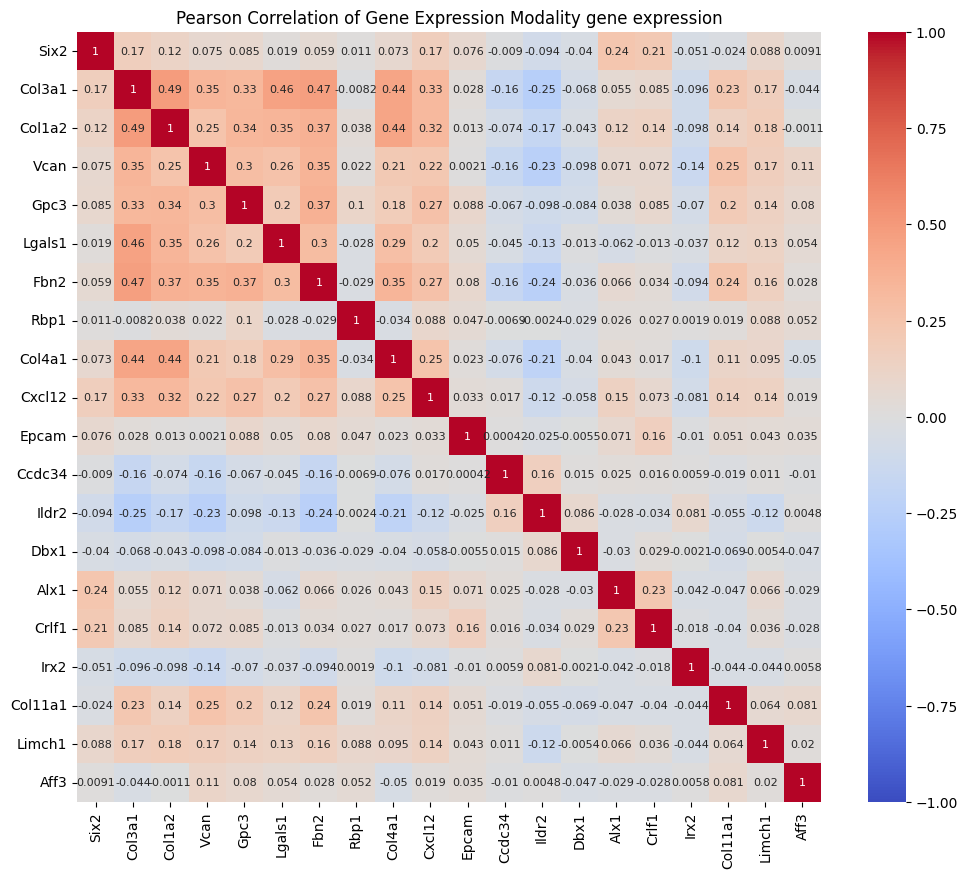

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(gene_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 8})
plt.title("Pearson Correlation of Gene Expression Modality gene expression")
plt.show()

# Protein modality

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import anndata as ad

# Load the anndata object
adata = ad.read_h5ad('/content/drive/MyDrive/Colab Notebooks/adatas_all_1.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 936 × 22
    obs: 'id', 'array_row', 'array_col', 'cell_type', 'batch', 'imagecol', 'imagerow', 'label', 'sample'
    var: 'gene_ids'
    obsm: 'spatial'

In [ ]:
print(adata.var_names)

Index(['CD102.ICAM2', 'CD117.KIT', 'CD201.EPCR', 'CD304.NPR1', 'CD309.KDR',
       'CD41.ITGA2B', 'CD45.PTPRC', 'CD55', 'CD63', 'ESAM', 'FCER1A',
       'Folate.Receptor', 'Ly.6A.E', 'MAdCAM.1', 'NK.1.1.KLRB1', 'Notch1',
       'P2RY12', 'SiglecH.SIGLEC', 'ErythroidCells.LY76', 'CD49d.ITGA4',
       'CD326.Ep.CAM', 'PanendothelialCellAntigen'],
      dtype='object')


In [ ]:
proteins = [
    "PanendothelialCellAntigen",
    "CD326.Ep.CAM",
    "NK.1.1.KLRB1",
    "CD201.EPCR",
    "CD55",
    "Folate.Receptor",
    "CD63"
]

In [ ]:
missing_proteins = [protein for protein in proteins if protein not in adata.var_names]
print("Missing:", missing_proteins)

Missing: []


In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
protein_expression = adata[:, proteins].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
protein_corr = np.corrcoef(protein_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
protein_corr_df = pd.DataFrame(protein_corr, index=proteins, columns=proteins)

# Display the correlation matrix
print(protein_corr_df)

                           PanendothelialCellAntigen  CD326.Ep.CAM  \
PanendothelialCellAntigen                   1.000000      0.900322   
CD326.Ep.CAM                                0.900322      1.000000   
NK.1.1.KLRB1                                0.779682      0.831265   
CD201.EPCR                                  0.834912      0.851959   
CD55                                        0.783788      0.779725   
Folate.Receptor                             0.865424      0.874012   
CD63                                        0.850451      0.844233   

                           NK.1.1.KLRB1  CD201.EPCR      CD55  \
PanendothelialCellAntigen      0.779682    0.834912  0.783788   
CD326.Ep.CAM                   0.831265    0.851959  0.779725   
NK.1.1.KLRB1                   1.000000    0.756865  0.710350   
CD201.EPCR                     0.756865    1.000000  0.762814   
CD55                           0.710350    0.762814  1.000000   
Folate.Receptor                0.793001    0.8528

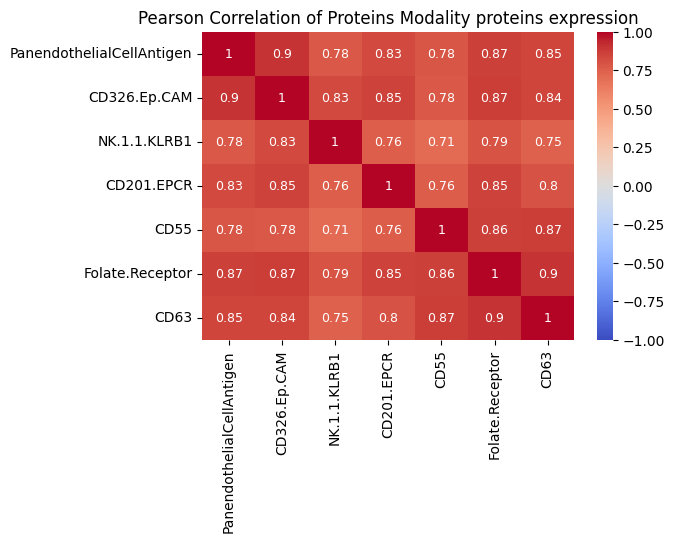

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(protein_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 9})
plt.title("Pearson Correlation of Proteins Modality proteins expression")
plt.show()

In [ ]:
proteins = ['CD102.ICAM2', 'CD117.KIT', 'CD201.EPCR', 'CD304.NPR1', 'CD309.KDR',
       'CD41.ITGA2B', 'CD45.PTPRC', 'CD55', 'CD63', 'ESAM', 'FCER1A',
       'Folate.Receptor', 'Ly.6A.E', 'MAdCAM.1', 'NK.1.1.KLRB1', 'Notch1',
       'P2RY12', 'SiglecH.SIGLEC', 'ErythroidCells.LY76', 'CD49d.ITGA4',
       'CD326.Ep.CAM', 'PanendothelialCellAntigen']

In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
protein_expression = adata[:, proteins].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
protein_corr = np.corrcoef(protein_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
protein_corr_df = pd.DataFrame(protein_corr, index=proteins, columns=proteins)

# Display the correlation matrix
print(protein_corr_df)

                           CD102.ICAM2  CD117.KIT  CD201.EPCR  CD304.NPR1  \
CD102.ICAM2                   1.000000   0.923088    0.840985    0.938005   
CD117.KIT                     0.923088   1.000000    0.843922    0.950856   
CD201.EPCR                    0.840985   0.843922    1.000000    0.891244   
CD304.NPR1                    0.938005   0.950856    0.891244    1.000000   
CD309.KDR                     0.909370   0.915622    0.870608    0.962201   
CD41.ITGA2B                   0.857342   0.854787    0.836652    0.907931   
CD45.PTPRC                    0.890843   0.890151    0.849908    0.930158   
CD55                          0.807863   0.784571    0.762814    0.829901   
CD63                          0.866350   0.858370    0.802101    0.878759   
ESAM                          0.856134   0.867898    0.817755    0.901269   
FCER1A                        0.905759   0.942751    0.863482    0.956306   
Folate.Receptor               0.882137   0.871294    0.852850    0.921111   

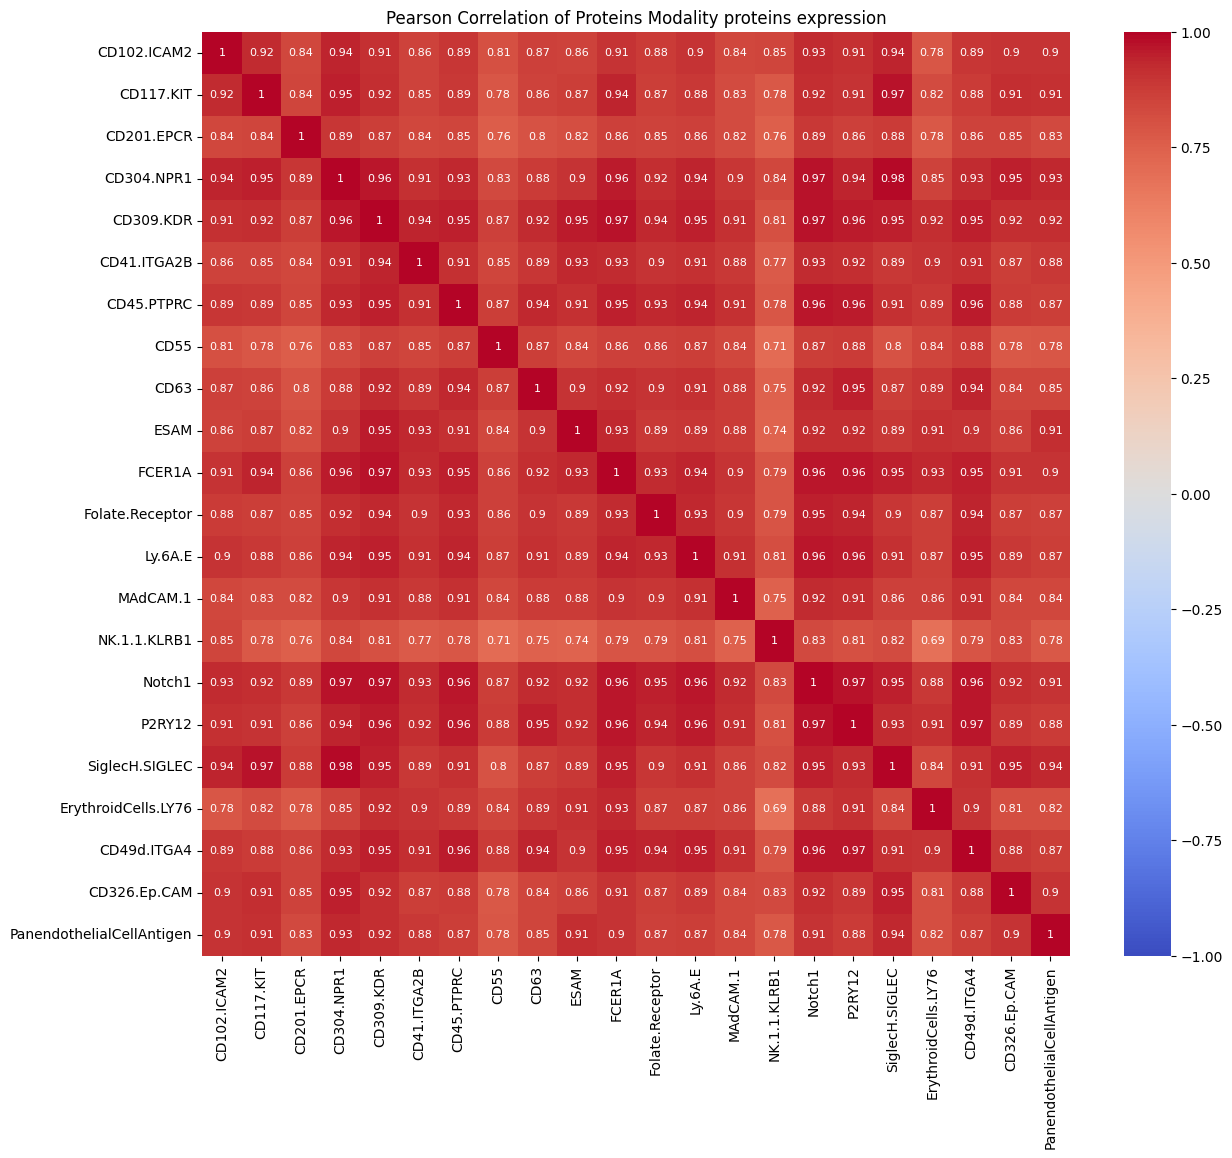

In [ ]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(protein_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 8})
plt.title("Pearson Correlation of Proteins Modality proteins expression")
plt.show()

# Niche modality other genes

In [ ]:
Dicer1_mon_genes = ['Dicer1', "Col3a1", "Vcan", "Gpc3", "Glra1", "Crabp1", "Ednrb", "Hoxa5", "Msx3", "Fbn2",
    "Epcr", "CD63", "KLRB1", "Ildr2", "Ccdc34", "Dbx1", "Madcam1",
    "EPCR", "CD63", "Slc1a2", "Hoxb4", "Msx3", "KLRB1",
    "Ly.6A.E", "Hoxb7", "Hoxc4", "Glra1", "ITGA2B", "ESAM", "LY76",
    "Dbx1", "Wnt4", "Zeb2", "CD201.EPCR", "CD55", "Fol1", "Col11a1",
    "Limch1", "Aff3"
]

In [ ]:
# Load the anndata object
adata = ad.read_h5ad('/content/drive/MyDrive/Colab Notebooks/adatas_all_2.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 936 × 568
    obs: 'id', 'array_row', 'array_col', 'cell_type', 'batch', 'imagecol', 'imagerow', 'label', 'sample', 'predict_sub', 'predict_sub_less'
    var: 'gene_ids'
    obsm: 'spatial'

In [ ]:
genes_M = ['Six2', 'Col3a1', 'Col1a2', 'Vcan', 'Gpc3', 'Lgals1', 'Fbn2', 'Rbp1', 'Col4a1', 'Cxcl12',
    "Epcam",
    "Ccdc34", "Ildr2", "Dbx1", "Alx1", "Crlf1", "Irx2", "Col11a1", "Limch1", "Aff3"
]

In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
gene_expression = adata[:, genes_M].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
gene_corr = np.corrcoef(gene_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
gene_corr_df = pd.DataFrame(gene_corr, index=genes_M, columns=genes_M)

# Display the correlation matrix
print(gene_corr_df)

             Six2    Col3a1    Col1a2      Vcan      Gpc3    Lgals1      Fbn2  \
Six2     1.000000  0.285646  0.326545  0.212226  0.231653  0.027947  0.227930   
Col3a1   0.285646  1.000000  0.816322  0.545439  0.586969  0.726887  0.729950   
Col1a2   0.326545  0.816322  1.000000  0.526684  0.661942  0.669835  0.658569   
Vcan     0.212226  0.545439  0.526684  1.000000  0.563110  0.532746  0.619835   
Gpc3     0.231653  0.586969  0.661942  0.563110  1.000000  0.519512  0.666340   
Lgals1   0.027947  0.726887  0.669835  0.532746  0.519512  1.000000  0.589423   
Fbn2     0.227930  0.729950  0.658569  0.619835  0.666340  0.589423  1.000000   
Rbp1    -0.011985 -0.052313  0.079645  0.148292  0.254933 -0.009628  0.044557   
Col4a1   0.183596  0.739874  0.667380  0.411145  0.440912  0.575977  0.564414   
Cxcl12   0.396154  0.657554  0.672498  0.519588  0.662377  0.502653  0.593919   
Epcam    0.414209  0.121046  0.165637  0.121161  0.216484  0.080575  0.242487   
Ccdc34   0.064020 -0.320396 

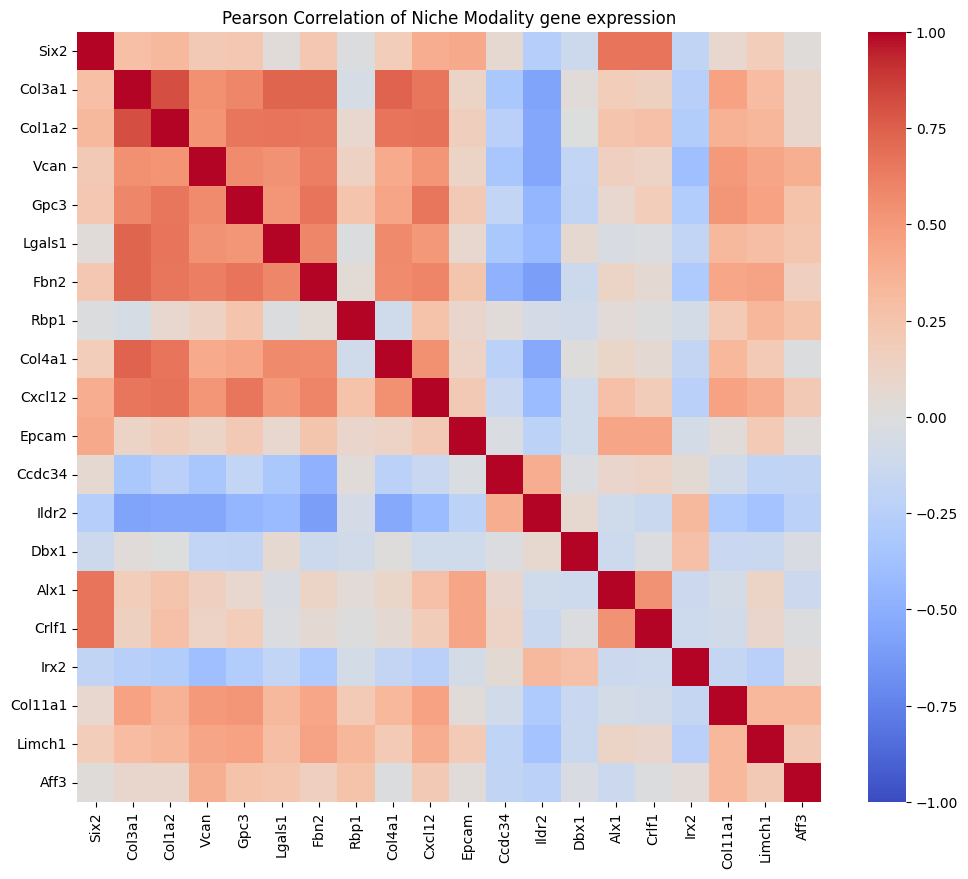

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(gene_corr_df, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation of Niche Modality gene expression")
plt.show()

In [ ]:
missing_genes = [gene for gene in Dicer1_mon_genes if gene not in adata.var_names]
print("Missing genes:", missing_genes)

Missing genes: ['ITGA2B', 'ESAM', 'LY76']


In [ ]:
Dicer1_mon_genes = ['Dicer1', "Col3a1", "Vcan", "Gpc3", "Glra1", "Crabp1", "Ednrb", "Hoxa5", "Msx3", "Fbn2",
                    "Ildr2", "Ccdc34",
                    "Slc1a2", "Hoxb4",
                    "Hoxb7", "Hoxc4",
                    "Dbx1", "Wnt4", "Zeb2", "Col11a1",
                    "Limch1", "Aff3"
]

In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
gene_expression = adata[:, Dicer1_mon_genes].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
gene_corr = np.corrcoef(gene_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
gene_corr_df = pd.DataFrame(gene_corr, index=Dicer1_mon_genes, columns=Dicer1_mon_genes)

# Display the correlation matrix
print(gene_corr_df)

           Dicer1    Col3a1      Vcan      Gpc3     Glra1    Crabp1     Ednrb  \
Dicer1   1.000000 -0.376240 -0.078281 -0.130020  0.157132 -0.267944  0.206380   
Col3a1  -0.376240  1.000000  0.545439  0.586969 -0.635917  0.254836 -0.567708   
Vcan    -0.078281  0.545439  1.000000  0.563110 -0.392645  0.097874 -0.414437   
Gpc3    -0.130020  0.586969  0.563110  1.000000 -0.236520  0.076080 -0.183231   
Glra1    0.157132 -0.635917 -0.392645 -0.236520  1.000000  0.080771  0.792726   
Crabp1  -0.267944  0.254836  0.097874  0.076080  0.080771  1.000000 -0.033685   
Ednrb    0.206380 -0.567708 -0.414437 -0.183231  0.792726 -0.033685  1.000000   
Hoxa5    0.176882 -0.439354 -0.227758 -0.034811  0.647180 -0.189365  0.696217   
Msx3     0.175743 -0.561843 -0.501106 -0.190786  0.702837 -0.061600  0.747590   
Fbn2    -0.186093  0.729950  0.619835  0.666340 -0.475540  0.036058 -0.434345   
Ildr2    0.225126 -0.562753 -0.554666 -0.459849  0.362908 -0.230996  0.437986   
Ccdc34   0.043338 -0.320396 

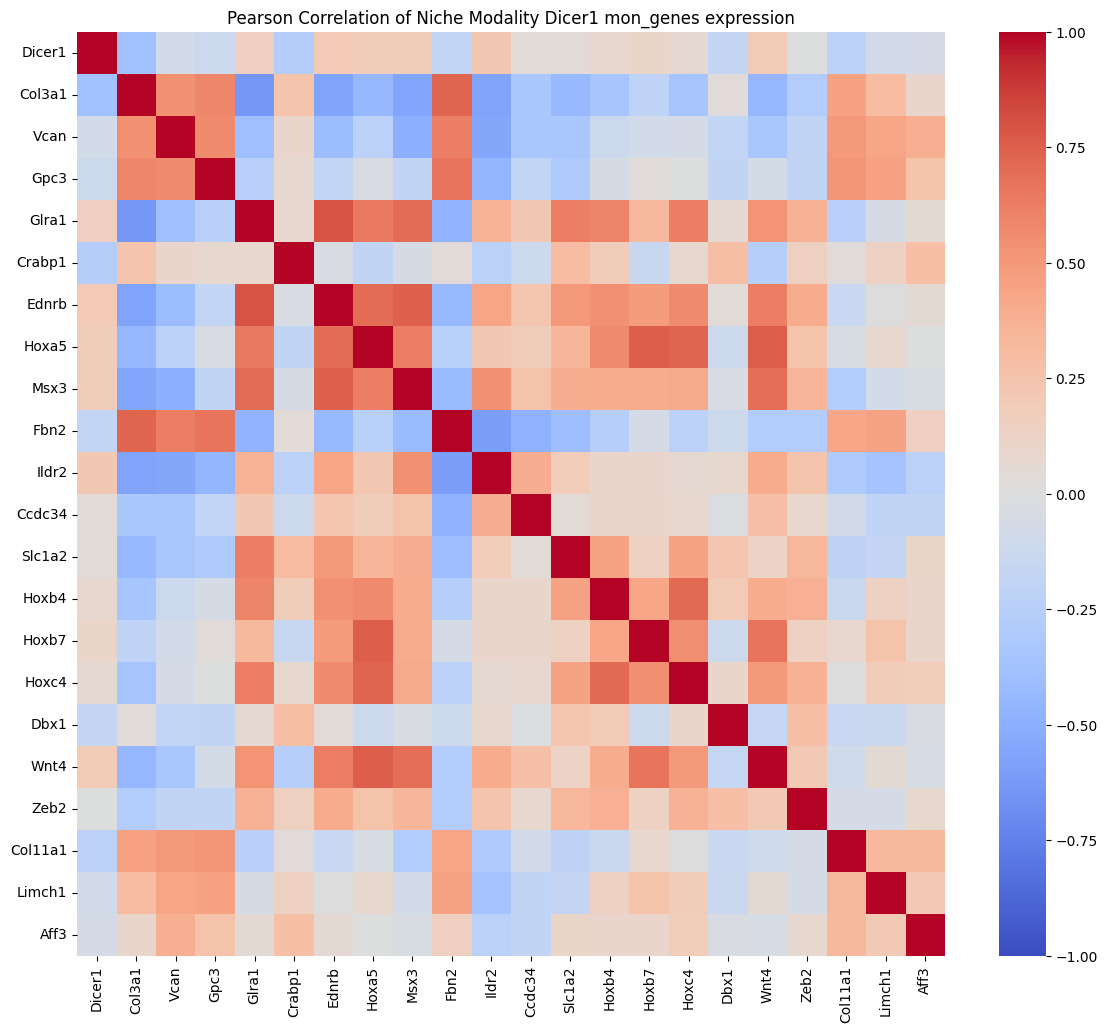

In [ ]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(gene_corr_df, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation of Niche Modality Dicer1 mon_genes expression")
plt.show()

In [ ]:
Gpc3_mon_genes = ['Gpc3',"Prrx1", "Rbp1", "Col2a1", "Cxcl12", "Meis1", "Glra1", "Sox9", "Hmcn1", "Fzd2",
    "P2RY12", "NPR1", "KDR", "Rchy1", "Mif", "Hsbp1", "MAdcam1",
    "EPCR", "CD63", "Slc1a2", "Hoxb4", "Msx3", "Siglech",
    "Zfp157", "Dab2", "Polr2j", "CD55", "Notch1",
    "Fzd4", "Cnn1", "Tgfbi"
]

In [ ]:
missing_genes = [gene for gene in Gpc3_mon_genes if gene not in adata.var_names]
print("Missing genes:", missing_genes)

Missing genes: ['P2RY12', 'NPR1', 'KDR', 'MAdcam1', 'EPCR', 'CD63', 'Siglech', 'CD55', 'Notch1']


In [ ]:
Gpc3_mon_genes = ['Gpc3', 'Prrx1', 'Rbp1', 'Col2a1', 'Cxcl12', 'Meis1', 'Glra1', 'Sox9', 'Hmcn1',
                           'Fzd2', 'Rchy1', 'Mif', 'Hsbp1', 'Slc1a2', 'Hoxb4', 'Msx3', 'Zfp157', 'Dab2',
                           'Polr2j', 'Fzd4', 'Cnn1', 'Tgfbi']

In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
gene_expression = adata[:, Gpc3_mon_genes].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
gene_corr = np.corrcoef(gene_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
gene_corr_df = pd.DataFrame(gene_corr, index=Gpc3_mon_genes, columns=Gpc3_mon_genes)

# Display the correlation matrix
print(gene_corr_df)

            Gpc3     Prrx1      Rbp1    Col2a1    Cxcl12     Meis1     Glra1  \
Gpc3    1.000000  0.510806  0.254933  0.591952  0.662377  0.157974 -0.236520   
Prrx1   0.510806  1.000000  0.233211  0.481666  0.514140  0.127689 -0.310827   
Rbp1    0.254933  0.233211  1.000000  0.175507  0.261440  0.521162  0.260473   
Col2a1  0.591952  0.481666  0.175507  1.000000  0.550511 -0.050280 -0.385075   
Cxcl12  0.662377  0.514140  0.261440  0.550511  1.000000  0.126549 -0.320038   
Meis1   0.157974  0.127689  0.521162 -0.050280  0.126549  1.000000  0.598112   
Glra1  -0.236520 -0.310827  0.260473 -0.385075 -0.320038  0.598112  1.000000   
Sox9    0.117025  0.186048  0.326005  0.283187  0.046572  0.240912  0.327180   
Hmcn1   0.571225  0.603720  0.148809  0.525271  0.563797  0.046393 -0.272933   
Fzd2    0.421071  0.445150  0.274455  0.422703  0.378293  0.382200  0.072341   
Rchy1   0.135452 -0.051448  0.234496  0.037482  0.107461  0.145635  0.094798   
Mif     0.205362  0.320687  0.249068  0.

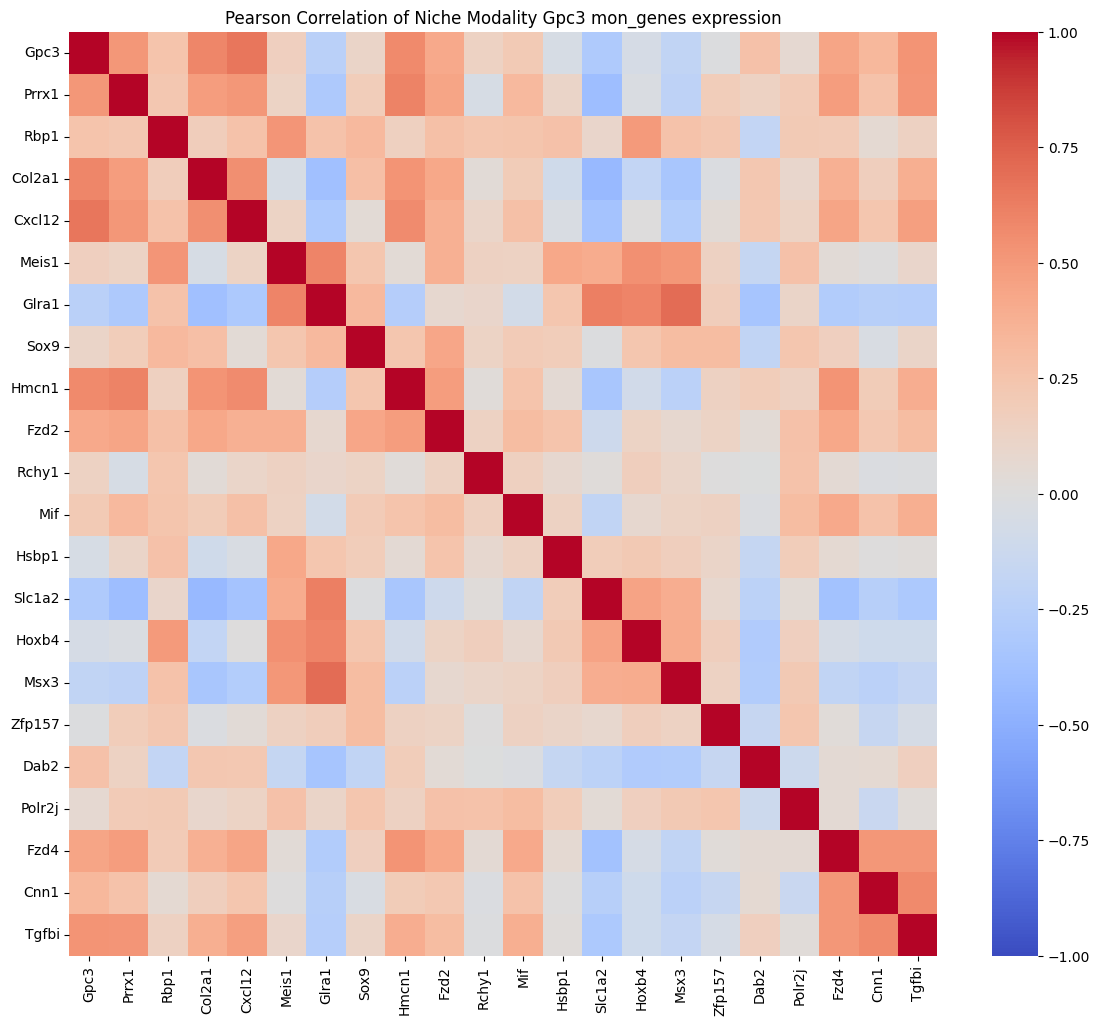

In [ ]:
# Plot a heatmap of the correlation matrix without annotations
plt.figure(figsize=(14, 12))
sns.heatmap(gene_corr_df, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation of Niche Modality Gpc3 mon_genes expression")
plt.show()

In [ ]:
genes_mega =['Gpc3', 'Prrx1', 'Rbp1', 'Col2a1', 'Cxcl12', 'Meis1', 'Glra1', 'Sox9', 'Hmcn1',
                           'Fzd2', 'Rchy1', 'Mif', 'Hsbp1', 'Slc1a2', 'Hoxb4', 'Msx3', 'Zfp157', 'Dab2',
                           'Polr2j', 'Fzd4', 'Cnn1', 'Tgfbi', 'Dicer1', "Col3a1", "Vcan", "Gpc3", "Glra1", "Crabp1", "Ednrb", "Hoxa5", "Msx3", "Fbn2",
                    "Ildr2", "Ccdc34",
                    "Slc1a2", "Hoxb4",
                    "Hoxb7", "Hoxc4",
                    "Dbx1", "Wnt4", "Zeb2", "Col11a1",
                    "Limch1", "Aff3", 'Six2', 'Col3a1', 'Col1a2', 'Vcan', 'Gpc3', 'Lgals1', 'Fbn2', 'Rbp1', 'Col4a1', 'Cxcl12',
    "Epcam",
    "Ccdc34", "Ildr2", "Dbx1", "Alx1", "Crlf1", "Irx2", "Col11a1", "Limch1", "Aff3" ]

In [ ]:
genes_mega_unique = ['Gpc3', 'Prrx1', 'Rbp1', 'Col2a1', 'Cxcl12', 'Meis1', 'Glra1', 'Sox9', 'Hmcn1',
                     'Fzd2', 'Rchy1', 'Mif', 'Hsbp1', 'Slc1a2', 'Hoxb4', 'Msx3', 'Zfp157', 'Dab2',
                     'Polr2j', 'Fzd4', 'Cnn1', 'Tgfbi', 'Dicer1', 'Col3a1', 'Vcan', 'Crabp1', 'Ednrb',
                     'Hoxa5', 'Fbn2', 'Ildr2', 'Ccdc34', 'Hoxb7', 'Hoxc4', 'Dbx1', 'Wnt4', 'Zeb2',
                     'Col11a1', 'Limch1', 'Aff3', 'Six2', 'Col1a2', 'Lgals1', 'Col4a1', 'Epcam',
                     'Alx1', 'Crlf1', 'Irx2']

In [ ]:
# Extract the spatial coordinates
spatial_coords = adata.obsm['spatial']

# Extract gene expression data for the genes of interest
gene_expression = adata[:, genes_mega_unique].X.toarray()  # Convert to dense array for easier handling

# Calculate Pearson correlation for the gene expression matrix
gene_corr = np.corrcoef(gene_expression.T)  # Transpose so that genes are on the rows

# Convert to a DataFrame for easier handling
gene_corr_df = pd.DataFrame(gene_corr, index=genes_mega_unique, columns=genes_mega_unique)

# Display the correlation matrix
print(gene_corr_df)

             Gpc3     Prrx1      Rbp1    Col2a1    Cxcl12     Meis1     Glra1  \
Gpc3     1.000000  0.510806  0.254933  0.591952  0.662377  0.157974 -0.236520   
Prrx1    0.510806  1.000000  0.233211  0.481666  0.514140  0.127689 -0.310827   
Rbp1     0.254933  0.233211  1.000000  0.175507  0.261440  0.521162  0.260473   
Col2a1   0.591952  0.481666  0.175507  1.000000  0.550511 -0.050280 -0.385075   
Cxcl12   0.662377  0.514140  0.261440  0.550511  1.000000  0.126549 -0.320038   
Meis1    0.157974  0.127689  0.521162 -0.050280  0.126549  1.000000  0.598112   
Glra1   -0.236520 -0.310827  0.260473 -0.385075 -0.320038  0.598112  1.000000   
Sox9     0.117025  0.186048  0.326005  0.283187  0.046572  0.240912  0.327180   
Hmcn1    0.571225  0.603720  0.148809  0.525271  0.563797  0.046393 -0.272933   
Fzd2     0.421071  0.445150  0.274455  0.422703  0.378293  0.382200  0.072341   
Rchy1    0.135452 -0.051448  0.234496  0.037482  0.107461  0.145635  0.094798   
Mif      0.205362  0.320687 

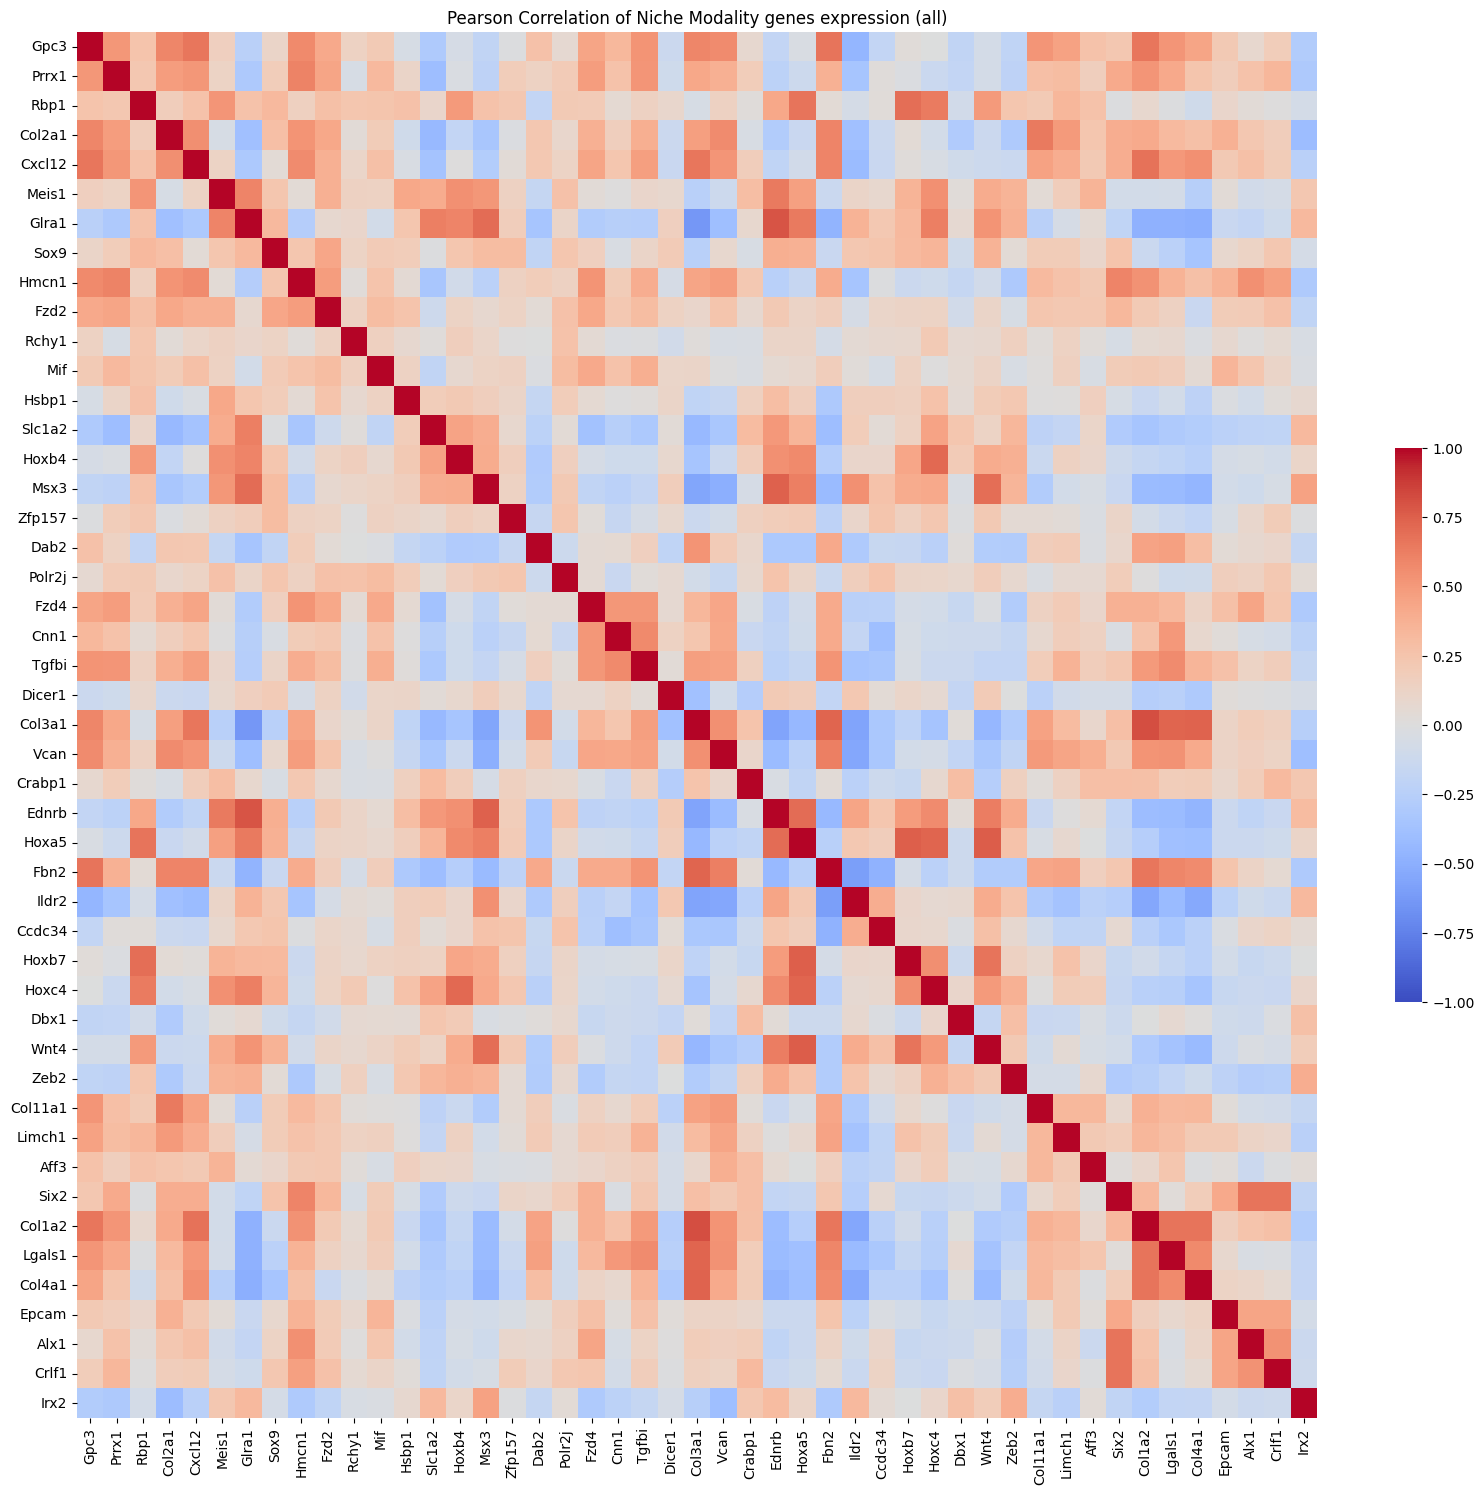

In [ ]:
# Plot a heatmap of the correlation matrix without annotations
plt.figure(figsize=(20, 18))
sns.heatmap(gene_corr_df, cmap='coolwarm', vmin=-1, vmax=1,cbar_kws={"shrink": 0.4})
plt.title("Pearson Correlation of Niche Modality genes expression (all)")
plt.show()

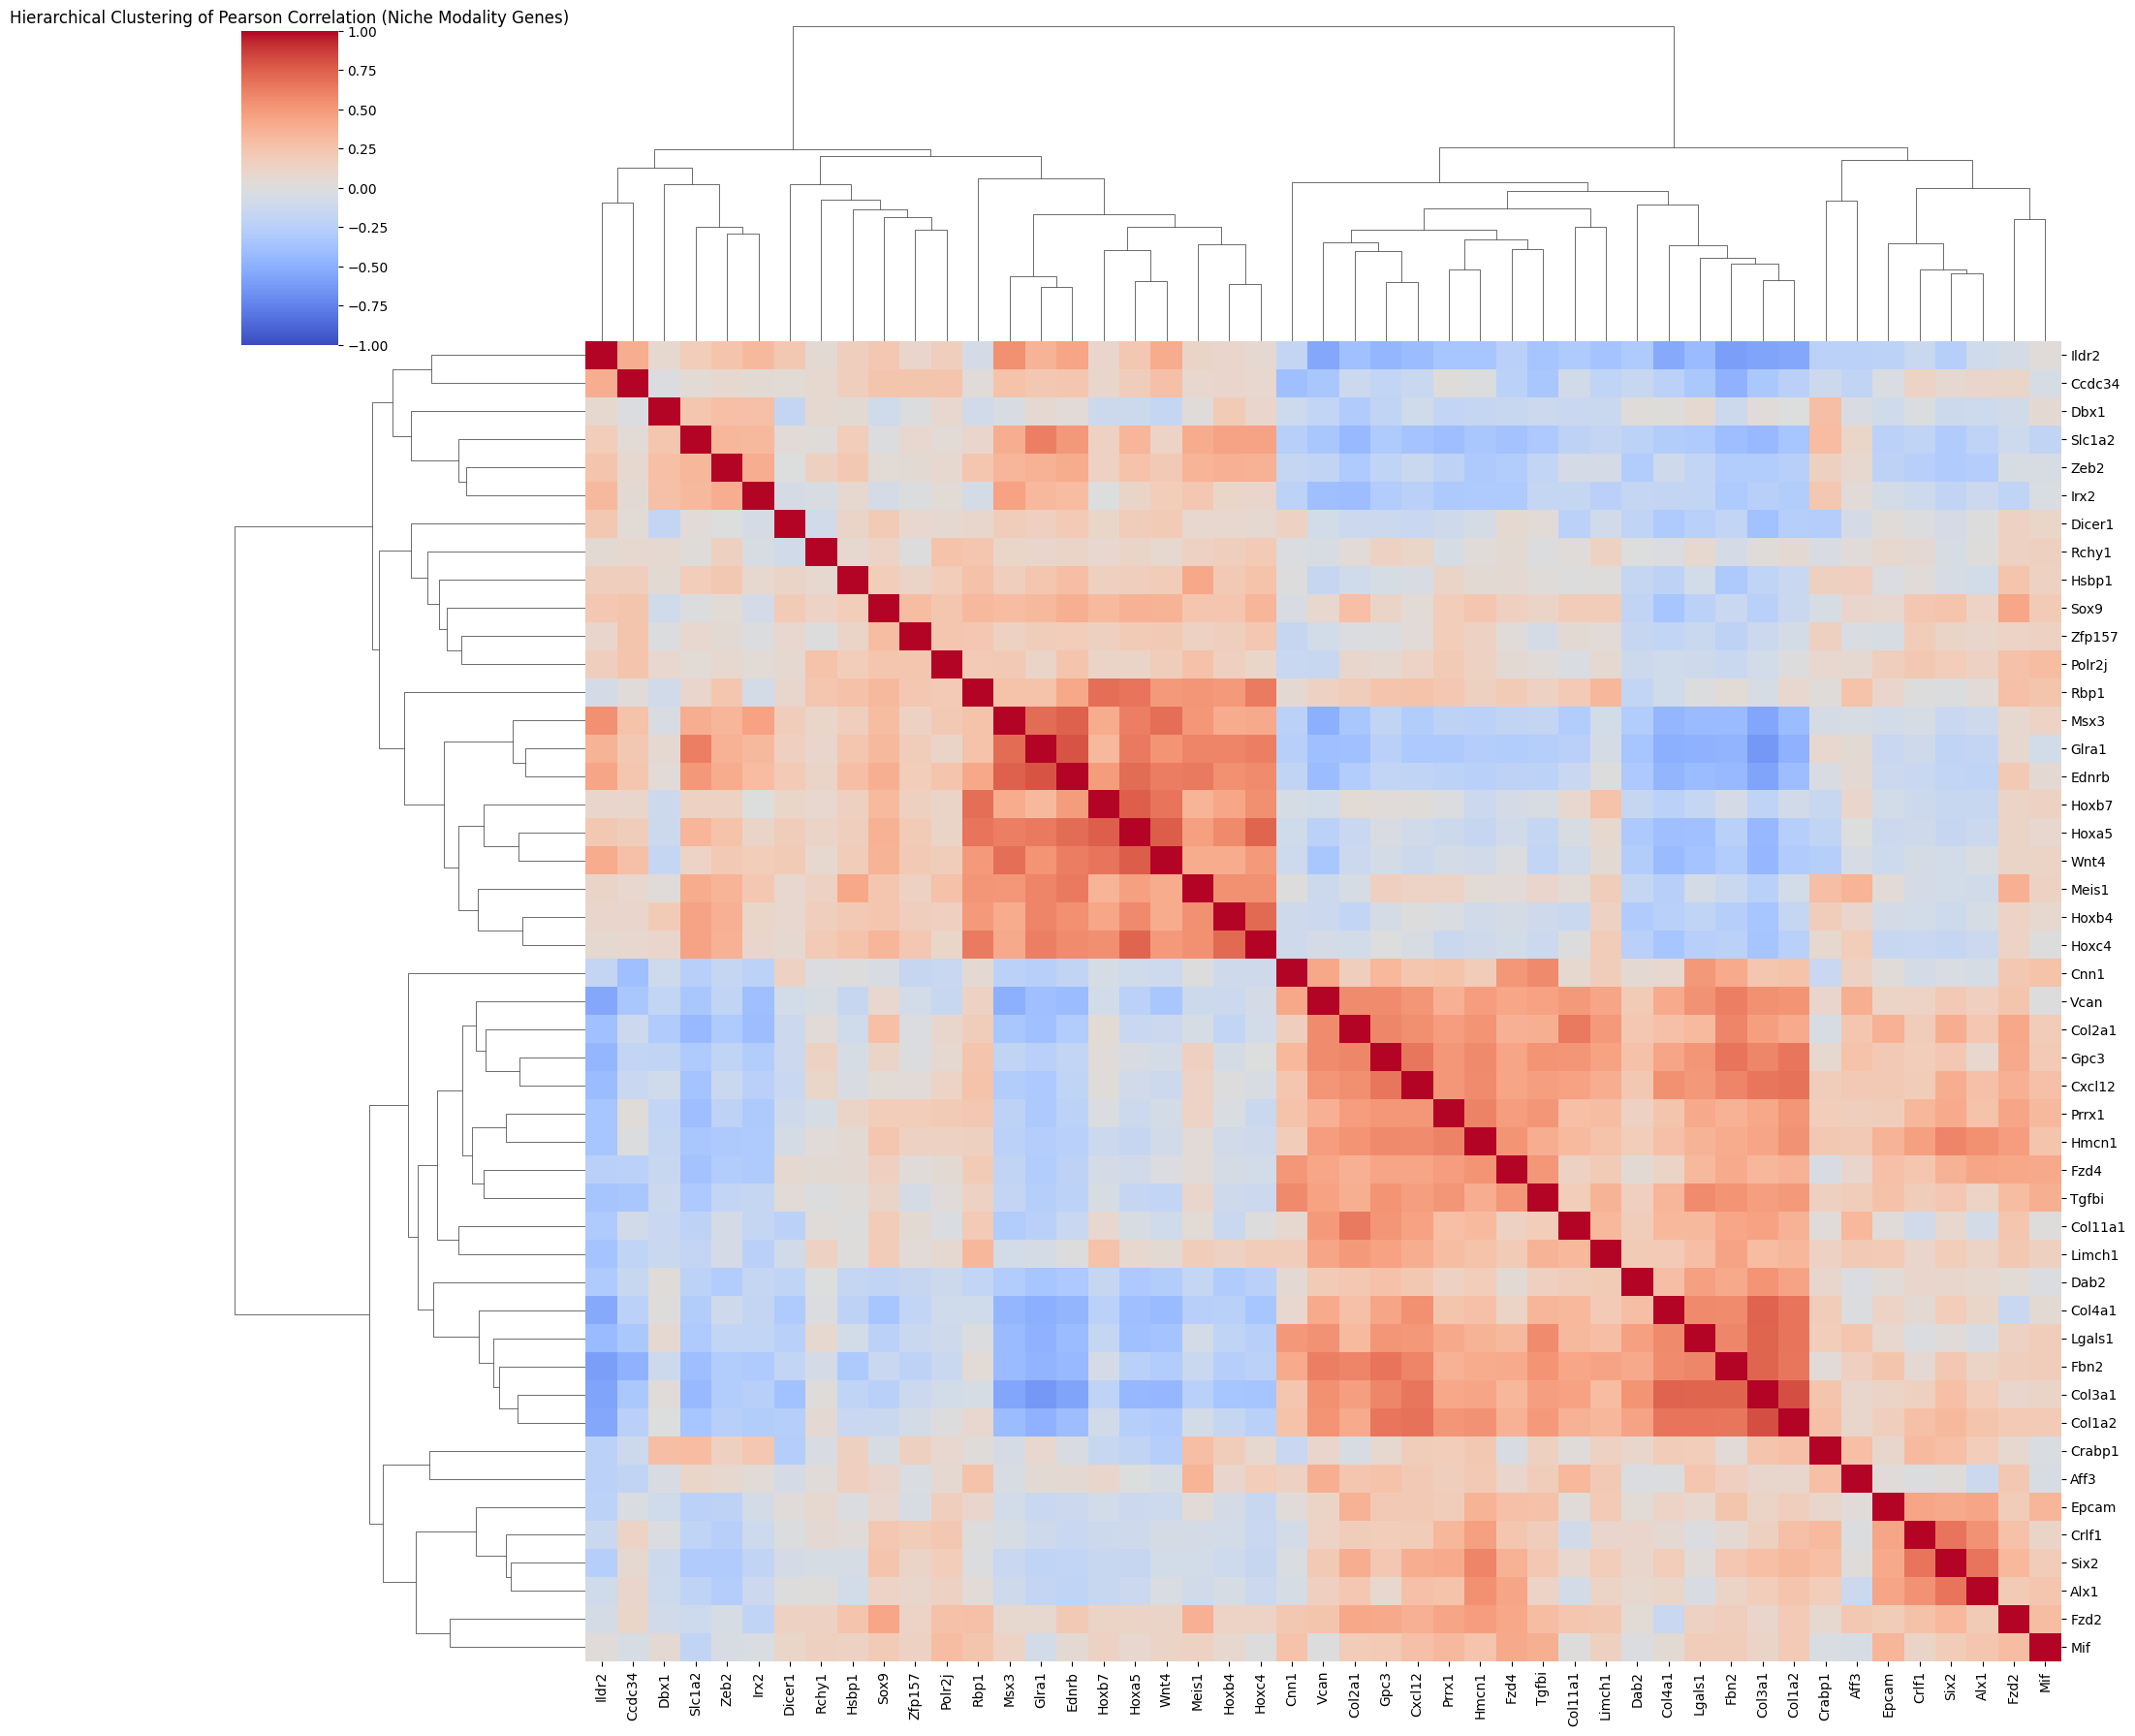

Ordered genes based on hierarchical clustering:
['Ildr2', 'Ccdc34', 'Dbx1', 'Slc1a2', 'Zeb2', 'Irx2', 'Dicer1', 'Rchy1', 'Hsbp1', 'Sox9', 'Zfp157', 'Polr2j', 'Rbp1', 'Msx3', 'Glra1', 'Ednrb', 'Hoxb7', 'Hoxa5', 'Wnt4', 'Meis1', 'Hoxb4', 'Hoxc4', 'Cnn1', 'Vcan', 'Col2a1', 'Gpc3', 'Cxcl12', 'Prrx1', 'Hmcn1', 'Fzd4', 'Tgfbi', 'Col11a1', 'Limch1', 'Dab2', 'Col4a1', 'Lgals1', 'Fbn2', 'Col3a1', 'Col1a2', 'Crabp1', 'Aff3', 'Epcam', 'Crlf1', 'Six2', 'Alx1', 'Fzd2', 'Mif']


In [ ]:
# Perform hierarchical clustering and plot the clustered heatmap
clustermap = sns.clustermap(gene_corr_df, cmap='Oranges', vmin=-1, vmax=1,
                            figsize=(20, 18),
                            method='average',
                            metric='euclidean',
                            cbar_kws={"shrink": 0.1})

plt.title("Hierarchical Clustering of Pearson Correlation (Niche Modality Genes)")
plt.show()

# Get the reordered genes after clustering
clustered_genes = clustermap.dendrogram_row.reordered_ind
ordered_genes = [gene_corr_df.index[i] for i in clustered_genes]

# Print the genes in the order of the clusters
print("Ordered genes based on hierarchical clustering:")
print(ordered_genes)

<ipython-input-127-164d51653b64>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  clustermap.cax.yaxis.set_ticklabels(clustermap.cax.yaxis.get_ticklabels(), color='white',fontsize=14)


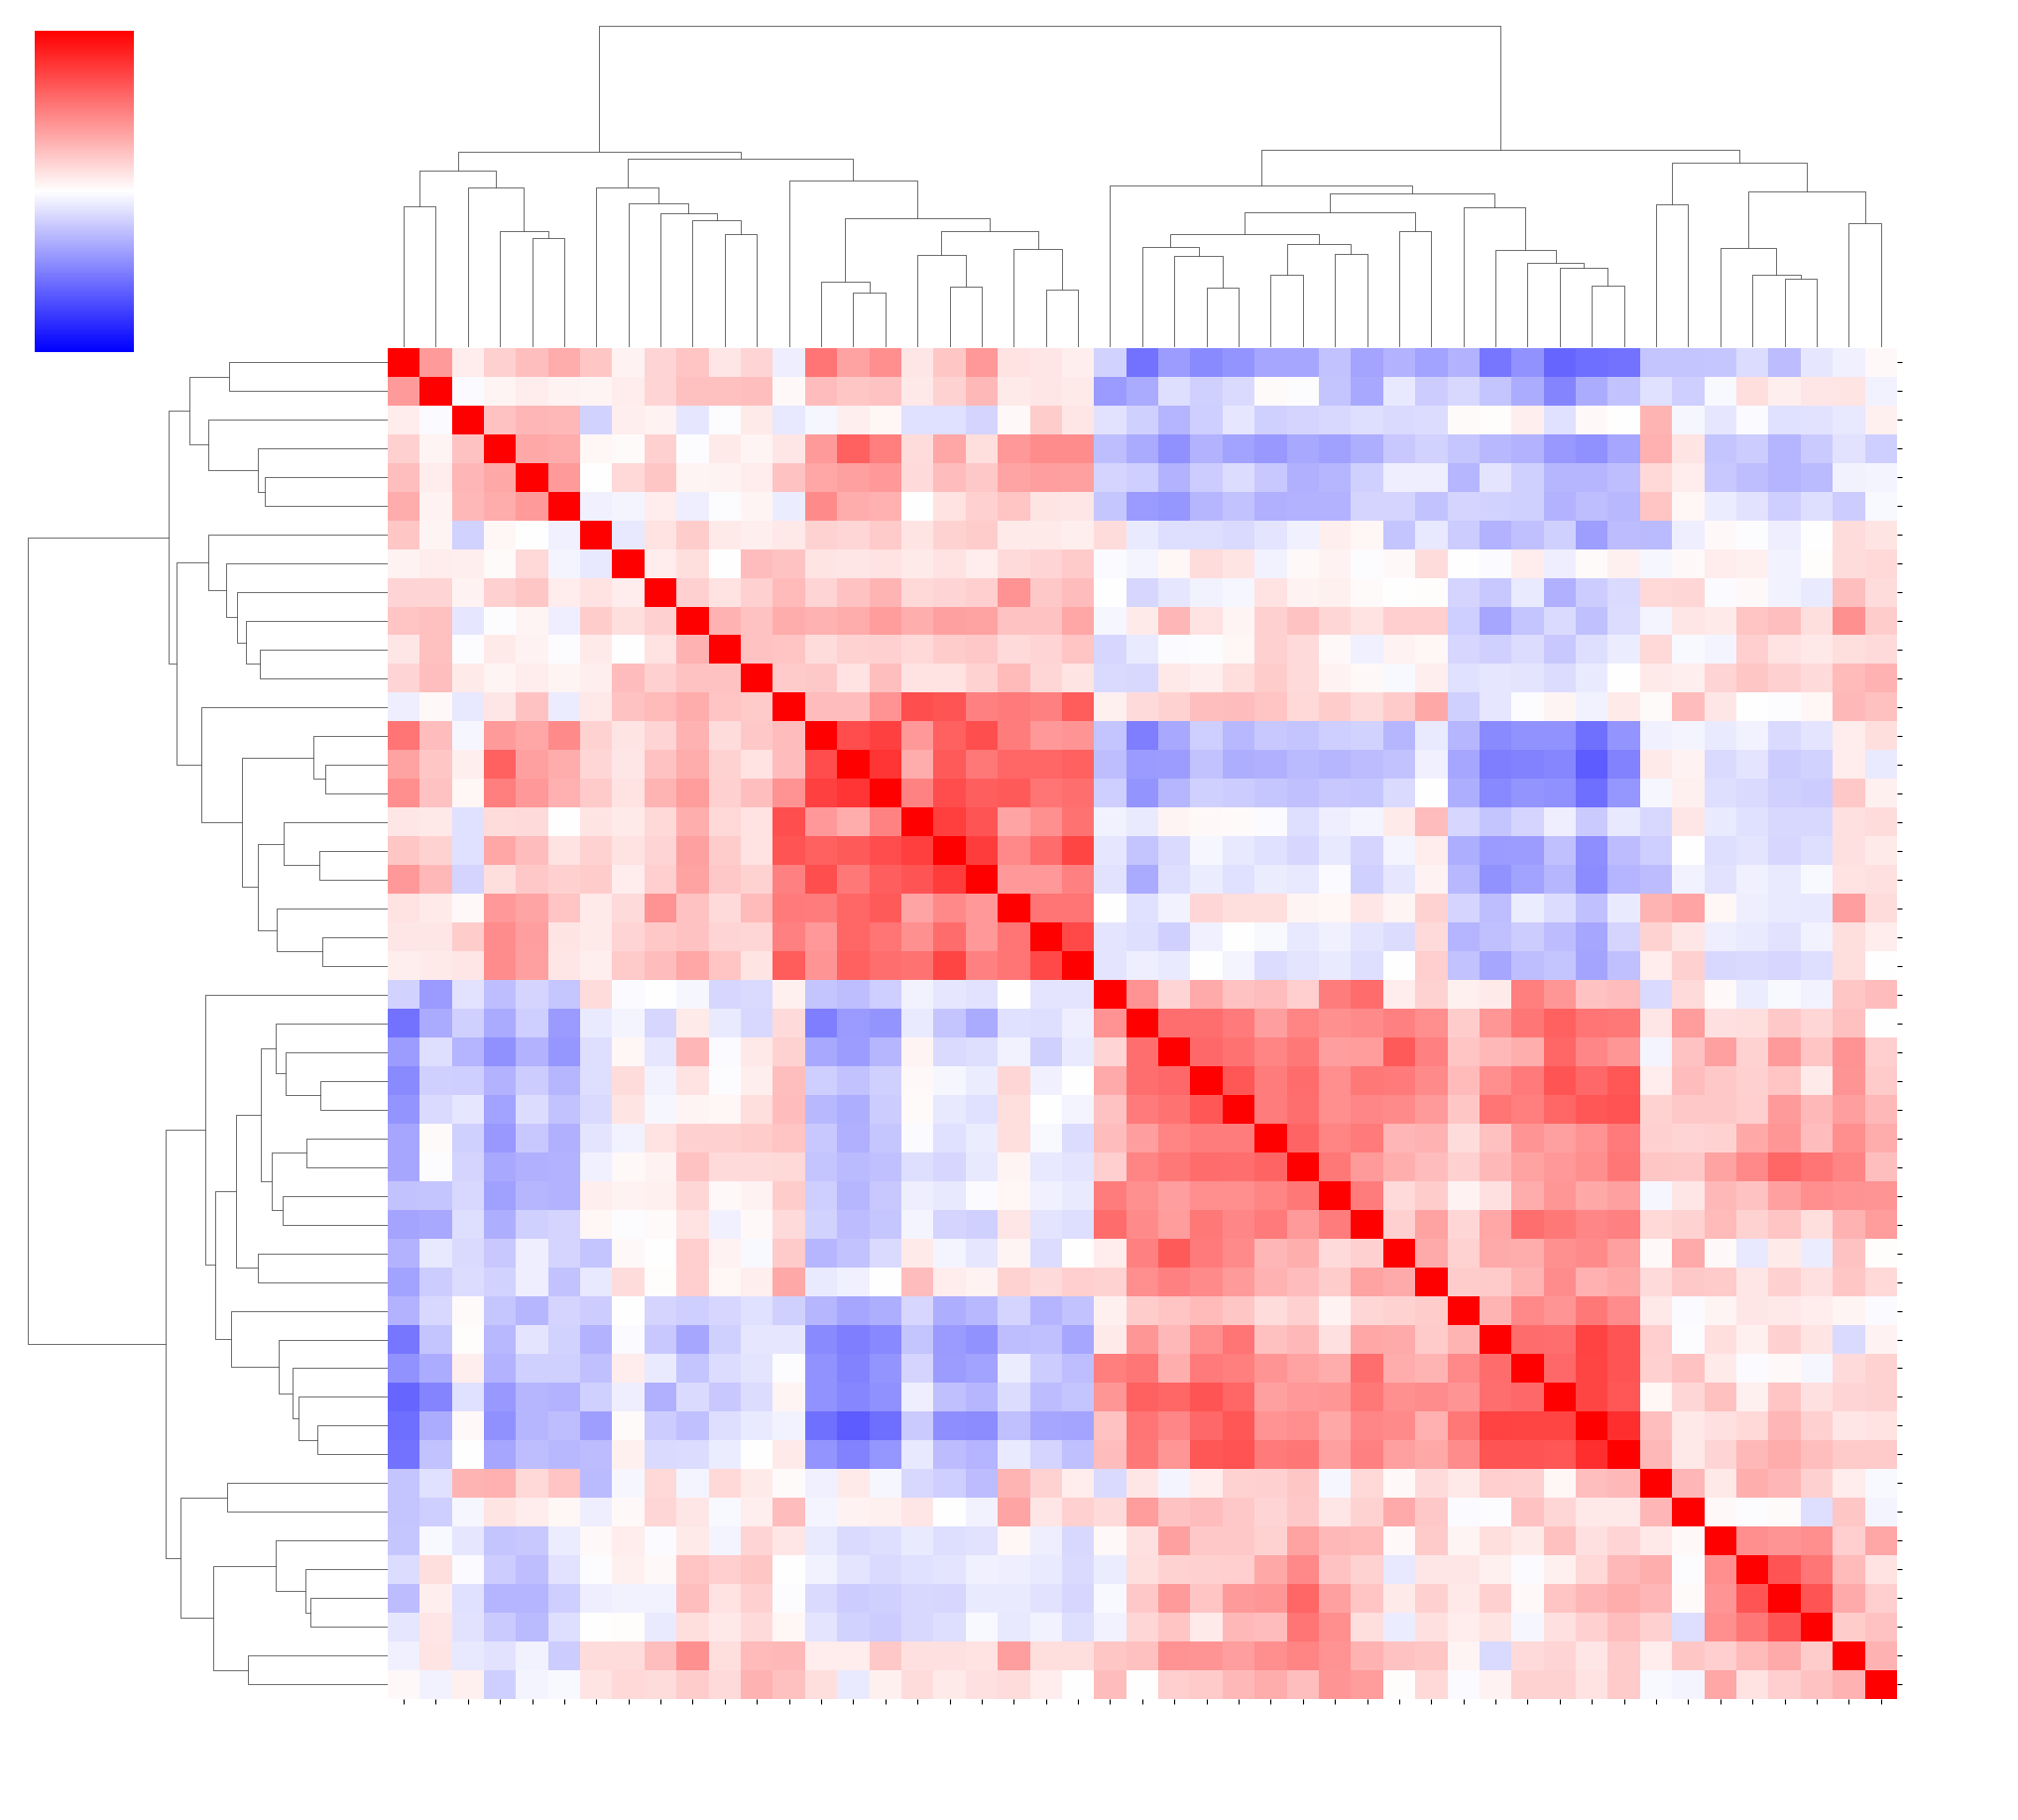

Ordered genes based on hierarchical clustering:
['Ildr2', 'Ccdc34', 'Dbx1', 'Slc1a2', 'Zeb2', 'Irx2', 'Dicer1', 'Rchy1', 'Hsbp1', 'Sox9', 'Zfp157', 'Polr2j', 'Rbp1', 'Msx3', 'Glra1', 'Ednrb', 'Hoxb7', 'Hoxa5', 'Wnt4', 'Meis1', 'Hoxb4', 'Hoxc4', 'Cnn1', 'Vcan', 'Col2a1', 'Gpc3', 'Cxcl12', 'Prrx1', 'Hmcn1', 'Fzd4', 'Tgfbi', 'Col11a1', 'Limch1', 'Dab2', 'Col4a1', 'Lgals1', 'Fbn2', 'Col3a1', 'Col1a2', 'Crabp1', 'Aff3', 'Epcam', 'Crlf1', 'Six2', 'Alx1', 'Fzd2', 'Mif']


In [ ]:
# Perform hierarchical clustering and plot the clustered heatmap
clustermap = sns.clustermap(gene_corr_df, cmap='bwr', vmin=-1, vmax=1,
                            figsize=(20, 18),
                            method='average',
                            metric='euclidean',
                            cbar_kws={"shrink": 0.5})

# Set background transparent
plt.gcf().set_facecolor('none')  # Makes the figure's background transparent

# Change the color of the colorbar text to white
clustermap.cax.yaxis.set_tick_params(color='white')
clustermap.cax.yaxis.set_ticklabels(clustermap.cax.yaxis.get_ticklabels(), color='white',fontsize=14)

# Increase the font size of the gene names (X and Y axis labels)
clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xmajorticklabels(), fontsize=18, color='white')
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_ymajorticklabels(), fontsize=18, color='white')

# Show the plot
plt.show()

# Get the reordered genes after clustering
clustered_genes = clustermap.dendrogram_row.reordered_ind  # Indices of the reordered genes
ordered_genes = [gene_corr_df.index[i] for i in clustered_genes]

# Print the genes in the order of the clusters
print("Ordered genes based on hierarchical clustering:")
print(ordered_genes)

<ipython-input-133-e163ec931828>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  clustermap.cax.yaxis.set_ticklabels(clustermap.cax.yaxis.get_ticklabels(), color='white', fontsize=14)


TypeError: cannot unpack non-iterable LineCollection object

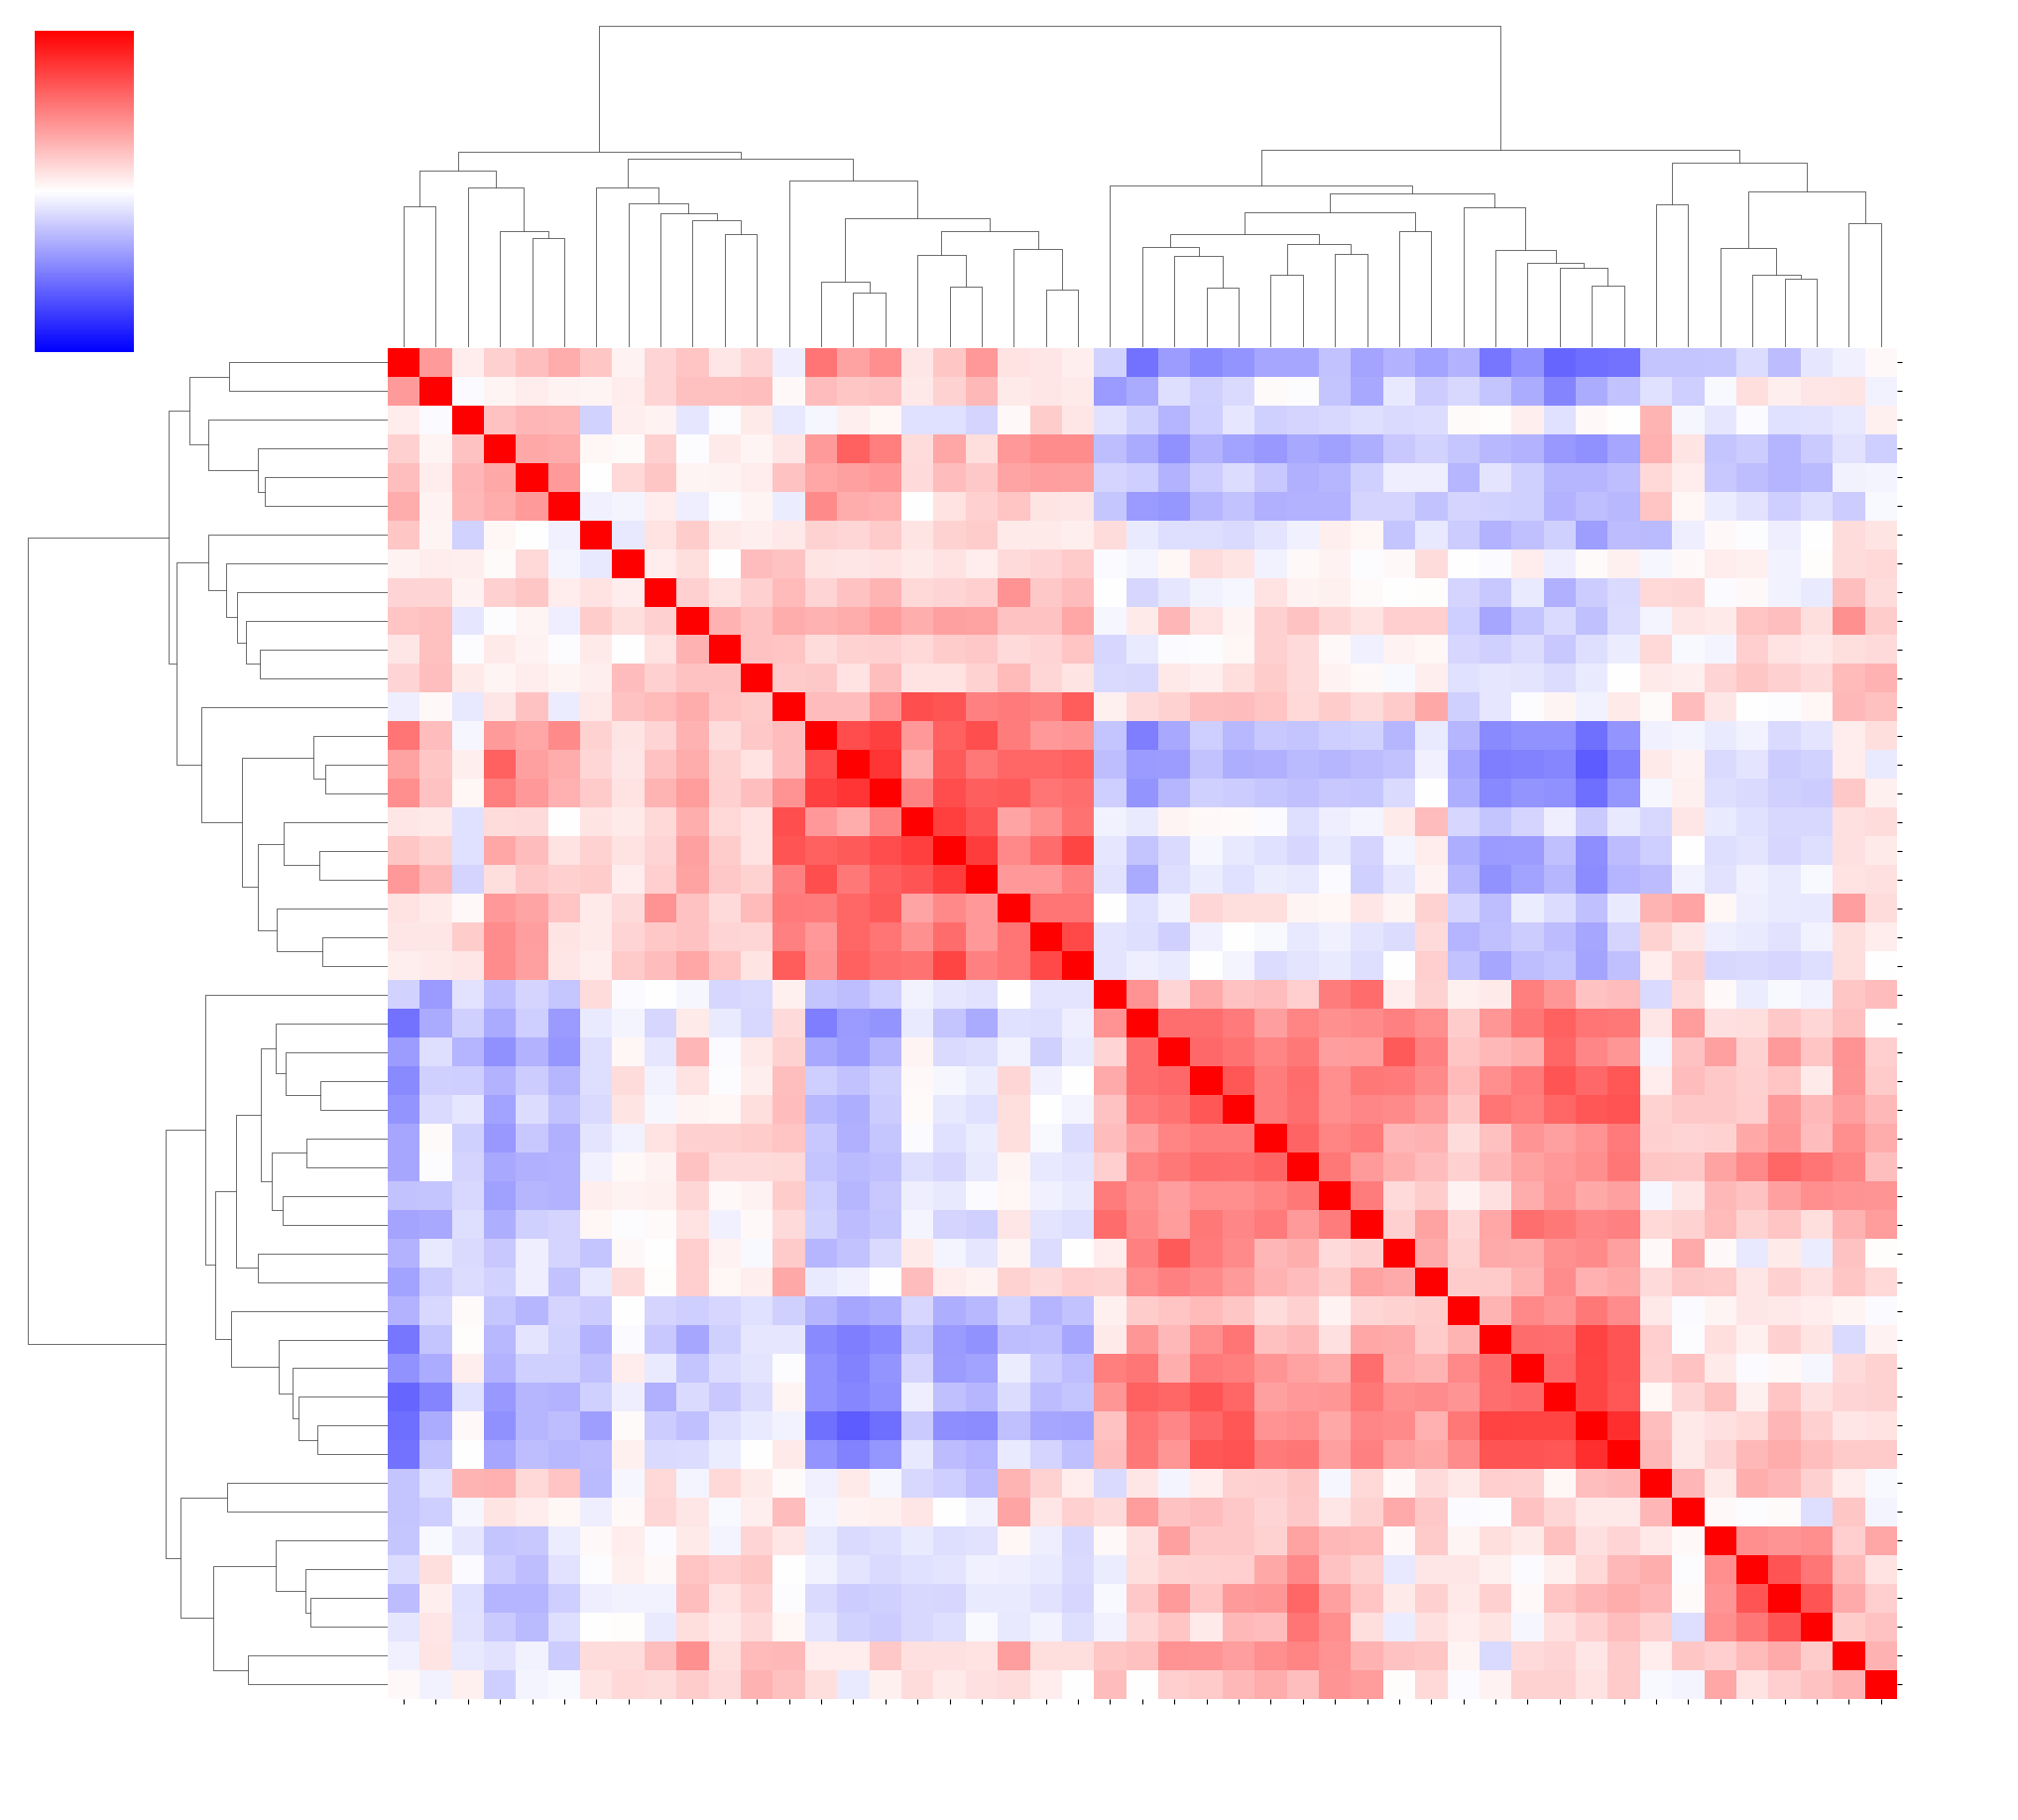

In [ ]:
# # Perform hierarchical clustering and plot the clustered heatmap
# clustermap = sns.clustermap(gene_corr_df, cmap='bwr', vmin=-1, vmax=1,
#                             figsize=(20, 18),
#                             method='average',  # Linkage method (can be 'single', 'complete', 'average', etc.)
#                             metric='euclidean',  # Distance metric (can be 'euclidean', 'correlation', etc.)
#                             cbar_kws={"shrink": 0.5})

# # Set background transparent
# plt.gcf().set_facecolor('none')  # Makes the figure's background transparent

# # Change the color of the colorbar text to white
# clustermap.cax.yaxis.set_tick_params(color='white')
# clustermap.cax.yaxis.set_ticklabels(clustermap.cax.yaxis.get_ticklabels(), color='white', fontsize=14)

# # Increase the font size of the gene names (X and Y axis labels)
# clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xmajorticklabels(), fontsize=18, color='white')
# clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_ymajorticklabels(), fontsize=18, color='white')

# # Change the cluster lines to white
# for _, line in clustermap.ax_row_dendrogram.collections:  # Modify row dendrogram lines
#     line.set_color('white')
# for _, line in clustermap.ax_col_dendrogram.collections:  # Modify column dendrogram lines
#     line.set_color('white')

# # Show the plot
# plt.show()

# # Get the reordered genes after clustering
# clustered_genes = clustermap.dendrogram_row.reordered_ind  # Indices of the reordered genes
# ordered_genes = [gene_corr_df.index[i] for i in clustered_genes]

# # Print the genes in the order of the clusters
# print("Ordered genes based on hierarchical clustering:")
# print(ordered_genes)